# Heston Model [Monte Carlo simulation]

In [25]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import minimize_scalar

In [26]:
def hestonModel(S_0, v_0, T, r, theta, kappa, xi, rho, steps, no_paths, return_vol = False):
    """Function generating stock price trajectories in Heston Model

    Args:
        S_0 (float): the initial stock price
        v_0 (float): the initial volatility
        T (int): time period
        r (float): the risk free rate
        theta (float): the long-term price variance
        kappa (float): the rate of reversion to theta
        xi (float): the volatility of sqrt(V_t)
        rho (float): the correlation of Brownian motions
        steps (int): number of steps/days
        no_paths (int): number of paths
        return_vol (bool, optional): check whether volatility should be returned. Defaults to False.

    Returns:
        array: The list of stock prices
    """
    dt = T/steps
    size = (no_paths, steps)
    prices = np.zeros(size)
    vols = np.zeros(size)
    S_t = S_0
    v_t = v_0
    for t in range(steps):
        W_t = np.random.multivariate_normal(np.array([0,0]),
                                     cov = np.array([[1, rho],[rho, 1]]),
                                     size = no_paths) * np.sqrt(dt)
        
        S_t = S_t * (np.exp((r - v_t/2)*dt + np.sqrt(v_t)*W_t[:,0]))
        v_t = np.abs(v_t + kappa*(theta - v_t)*dt + xi*np.sqrt(v_t)*W_t[:,1])
        prices[:,t] = S_t
        vols[:,t] = v_t
        
    if return_vol:
        return prices, vols
    
    return prices

In [33]:
# Initialize Heston Model parameters

r = 0               # the risk-free rate
theta = 0.04        # the long-term price variance
kappa = 1           # the rate of reversion to theta
xi = 2              # the volatility of sqrt(V_t)   
v_0 = 0.04          # the initial volatility
S_0 = 100           # the initial asset price
rho = -0.7          # the correlation of Brownian motions
steps = 1000        # number of steps
no_paths = 10       # number of trajectories
T = 1               # time period

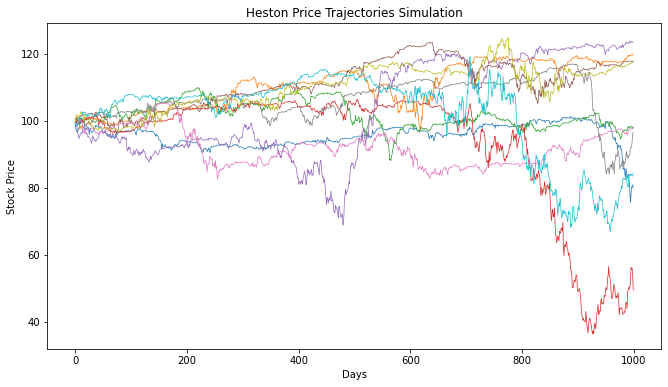

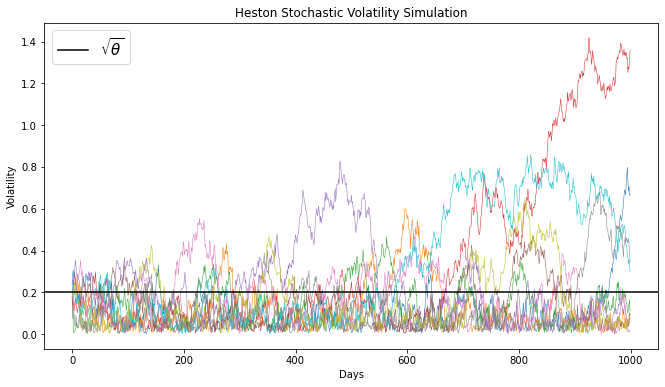

In [34]:
# Setup random seed
np.random.seed(7)

# Generate trajectories
prices, vols = hestonModel(S_0, v_0, T, r, theta, kappa, xi, rho, steps, no_paths, return_vol = True)

# Plot the Heston price trajectories
plt.figure(figsize=(11,6))
plt.plot(prices.T, linewidth = 0.7)
plt.title('Heston Price Trajectories Simulation')
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.show();

# Plot the Heston price stochastic volatilities
plt.figure(figsize=(11,6))
plt.plot(np.sqrt(vols).T, linewidth = 0.5)
plt.axhline(np.sqrt(theta), color='black', label=r'$\sqrt{\theta}$')
plt.title('Heston Stochastic Volatility Simulation')
plt.xlabel('Days')
plt.ylabel('Volatility')
plt.legend(fontsize=15)
plt.show()